In [1]:
import numpy as np
import torch

In [2]:
data = [[1,2],[3,4],[5,6]]
data_np = np.array(data, dtype=float)
data_t = torch.tensor(data, dtype=float, requires_grad=True)
data_t

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float64, requires_grad=True)

In [3]:
torch.rand(2,3,2)

tensor([[[0.4399, 0.4652],
         [0.3133, 0.4459],
         [0.2018, 0.3409]],

        [[0.2853, 0.7373],
         [0.3620, 0.7070],
         [0.6784, 0.9833]]])

In [4]:
torch.zeros_like(data_t)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64)

In [5]:
data_t

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float64, requires_grad=True)

In [6]:
data_t.shape, data_t.dtype, data_t.device

(torch.Size([3, 2]), torch.float64, device(type='cpu'))

In [7]:
if torch.cuda.is_available():
    my_device = 'cuda'
else:
    my_device = 'cpu'

t = torch.ones(5,3, device=my_device)

In [8]:
t[:,1] = 0
t[2,:] = 2
t[3,0] = 4
t[0:,2]
t[3]

tensor([4., 0., 1.])

In [9]:
t**t

tensor([[  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  4.,   4.,   4.],
        [256.,   1.,   1.],
        [  1.,   1.,   1.]])

In [10]:
t.T

tensor([[1., 1., 2., 4., 1.],
        [0., 0., 2., 0., 0.],
        [1., 1., 2., 1., 1.]])

In [11]:
# l2 has 2 neurons
l1 = torch.tensor([1.1,-0.5])
# l2 has 3 neurons
w1 = torch.tensor([[2.4,1.2],[-1.4,0.2],[0.1,-3.1]])
b1 = torch.tensor([1.5,-0.9,-0.7])

l2 = torch.relu(w1@l1 + b1)
l2

tensor([3.5400, 0.0000, 0.9600])

In [12]:
l2.sum()

tensor(4.5000)

In [13]:
def f(x):
    return x**2-x+3
x = torch.tensor(-0.5, requires_grad=True)

print('x', x)
print('x.grad', x.grad)
y = f(x)
print('y = f(x)', y)
y.backward()
print('x', x)
print('x.grad', x.grad)


x tensor(-0.5000, requires_grad=True)
x.grad None
y = f(x) tensor(3.7500, grad_fn=<AddBackward0>)
x tensor(-0.5000, requires_grad=True)
x.grad tensor(-2.)


In [14]:
from torchviz import make_dot

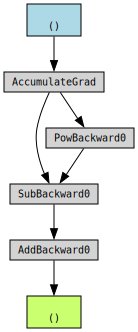

In [15]:
make_dot(y)

x tensor(17., requires_grad=True)
x.grad None
y = f(x) tensor(1.5812e-12, grad_fn=<DivBackward0>)
x tensor(17., requires_grad=True)
x.grad tensor(-4.3014e-06)


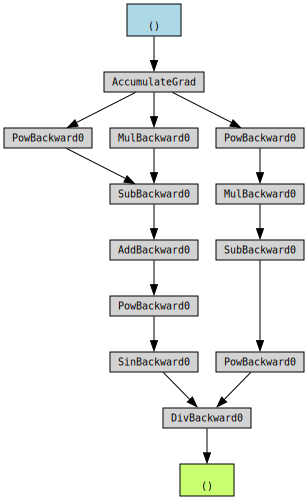

In [20]:
def f(x):
    return (torch.sin(((x**2)-(3*x)+0.5)**3)/((3*x**2)-1)**4)
x = torch.tensor(17.0, requires_grad=True)

print('x', x)
print('x.grad', x.grad)
y = f(x)
print('y = f(x)', y)
y.backward()
print('x', x)
print('x.grad', x.grad)
make_dot(y)

x, y tensor(5., requires_grad=True) tensor(-5., requires_grad=True)
x.grad None
y.grad None
t = f(x,y) tensor(250., grad_fn=<AddBackward0>)
x, y tensor(5., requires_grad=True) tensor(-5., requires_grad=True)
x.grad tensor(-25.)
y.grad tensor(-175.)


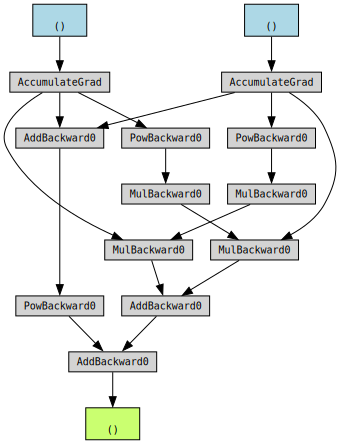

In [21]:
def f(x,y):
    return ((3*x**2*y)+(5*y**2*x)+(x+y)**3)
x = torch.tensor(5.0, requires_grad=True)
y = torch.tensor(-5.0, requires_grad=True)

print('x, y', x, y)
print('x.grad', x.grad)
print('y.grad', y.grad)
t = f(x,y)
print('t = f(x,y)', t)
t.backward()
print('x, y', x, y)
print('x.grad', x.grad)
print('y.grad', y.grad)
make_dot(t)

In [66]:
w = torch.tensor([2.1, 4.2, 5.0], requires_grad=True)
x = torch.tensor([1.2, -0.5, -1.0])
y = torch.tensor(5.0)
output = sum(x*w)
error = output-y
print(output)
print(error)
# objective = 


tensor(-4.5800, grad_fn=<AddBackward0>)
tensor(-9.5800, grad_fn=<SubBackward0>)
